In [1]:
import pandas as pd
import numpy as np

# Identification Null Values and Replace by using sklearn and manually

In [11]:
data=pd.read_csv("E:/DS/Datasets/Sample_real_estate_data.csv")

In [12]:
data.head()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,NaN,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600


In [13]:
data

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,NaN,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,unknown,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [90]:
missing_values=['nan','--','unknown','na']

In [91]:
data=pd.read_csv("E:/DS/Datasets/Sample_real_estate_data.csv",na_values=missing_values)

In [92]:
data

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,NaN,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [23]:
data.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         1
OWN_OCCUPIED    1
NUM_BEDROOMS    2
NUM_BATH        1
SQ_FT           2
dtype: int64

In [18]:
data.columns

Index(['PID', 'ST_NUM', 'ST_NAME', 'OWN_OCCUPIED', 'NUM_BEDROOMS', 'NUM_BATH',
       'SQ_FT'],
      dtype='object')

In [24]:
data['OWN_OCCUPIED'].isnull()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

In [26]:
data['OWN_OCCUPIED'] #unexpected value at 3 index we are asuming string but there is an numeric value

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [30]:
count=0
for row in data['OWN_OCCUPIED']:
    try: 
        int(row)
        data.loc[count,'OWN_OCCUPIED']=np.nan
    except ValueError: 
        pass
    count+=1

In [31]:
data['OWN_OCCUPIED']

0      Y
1      N
2      N
3    NaN
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [34]:
from sklearn.impute import SimpleImputer


In [63]:
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
#replace missing values with missing value

In [64]:
x= data.iloc[:,:-1].values
x

array([[100001000.0, 104.0, 'PUTNAM', 'Y', '3', '1'],
       [100002000.0, 197.0, 'LEXINGTON', 'N', '3', '1.5'],
       [100003000.0, nan, 'LEXINGTON', 'N', nan, '1'],
       [100004000.0, 201.0, 'BERKELEY', nan, '1', nan],
       [nan, 203.0, 'BERKELEY', 'Y', '3', '2'],
       [100006000.0, 207.0, 'BERKELEY', 'Y', nan, '1'],
       [100007000.0, nan, nan, nan, '2', 'HURLEY'],
       [100008000.0, 213.0, 'TREMONT', 'Y', '1', '1'],
       [100009000.0, 215.0, 'TREMONT', 'Y', 'na', '2']], dtype=object)

In [65]:
y=data.iloc[:,6]
y

0    1000.0
1       NaN
2     850.0
3     700.0
4    1600.0
5     800.0
6     950.0
7       NaN
8    1800.0
Name: SQ_FT, dtype: float64

In [66]:
impute=impute.fit(x[:,1:2])
x[:,1:2]=impute.transform(x[:,1:2])
x[:,1:2]

array([[104.0],
       [197.0],
       [191.42857142857142],
       [201.0],
       [203.0],
       [207.0],
       [191.42857142857142],
       [213.0],
       [215.0]], dtype=object)

In [70]:
data.dtypes

PID             float64
ST_NUM          float64
ST_NAME          object
OWN_OCCUPIED     object
NUM_BEDROOMS     object
NUM_BATH         object
SQ_FT           float64
dtype: object

In [96]:
import math

In [98]:
median=math.floor(data['NUM_BEDROOMS'].median())
median

2

In [99]:
data['NUM_BEDROOMS'].fillna(median,inplace=True)

In [100]:
data['NUM_BEDROOMS']

0    3.0
1    3.0
2    2.0
3    1.0
4    3.0
5    2.0
6    2.0
7    1.0
8    2.0
Name: NUM_BEDROOMS, dtype: float64

# One Hot Vector

In [101]:
data=pd.read_csv('E:DS/Datasets/MallCustomers.csv')

In [102]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [103]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [104]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [147]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,4].values
X

array([[1, 'Male', 19, 15],
       [2, 'Male', 21, 15],
       [3, 'Female', 20, 16],
       [4, 'Female', 23, 16],
       [5, 'Female', 31, 17],
       [6, 'Female', 22, 17],
       [7, 'Female', 35, 18],
       [8, 'Female', 23, 18],
       [9, 'Male', 64, 19],
       [10, 'Female', 30, 19],
       [11, 'Male', 67, 19],
       [12, 'Female', 35, 19],
       [13, 'Female', 58, 20],
       [14, 'Female', 24, 20],
       [15, 'Male', 37, 20],
       [16, 'Male', 22, 20],
       [17, 'Female', 35, 21],
       [18, 'Male', 20, 21],
       [19, 'Male', 52, 23],
       [20, 'Female', 35, 23],
       [21, 'Male', 35, 24],
       [22, 'Male', 25, 24],
       [23, 'Female', 46, 25],
       [24, 'Male', 31, 25],
       [25, 'Female', 54, 28],
       [26, 'Male', 29, 28],
       [27, 'Female', 45, 28],
       [28, 'Male', 35, 28],
       [29, 'Female', 40, 29],
       [30, 'Female', 23, 29],
       [31, 'Male', 60, 30],
       [32, 'Female', 21, 30],
       [33, 'Male', 53, 33],
       [34, 'Mal

In [148]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [149]:
ct = ColumnTransformer([("Gender", OneHotEncoder(), [1])], remainder = 'passthrough')
X = ct.fit_transform(X)
X

array([[0.0, 1.0, 1, 19, 15],
       [0.0, 1.0, 2, 21, 15],
       [1.0, 0.0, 3, 20, 16],
       [1.0, 0.0, 4, 23, 16],
       [1.0, 0.0, 5, 31, 17],
       [1.0, 0.0, 6, 22, 17],
       [1.0, 0.0, 7, 35, 18],
       [1.0, 0.0, 8, 23, 18],
       [0.0, 1.0, 9, 64, 19],
       [1.0, 0.0, 10, 30, 19],
       [0.0, 1.0, 11, 67, 19],
       [1.0, 0.0, 12, 35, 19],
       [1.0, 0.0, 13, 58, 20],
       [1.0, 0.0, 14, 24, 20],
       [0.0, 1.0, 15, 37, 20],
       [0.0, 1.0, 16, 22, 20],
       [1.0, 0.0, 17, 35, 21],
       [0.0, 1.0, 18, 20, 21],
       [0.0, 1.0, 19, 52, 23],
       [1.0, 0.0, 20, 35, 23],
       [0.0, 1.0, 21, 35, 24],
       [0.0, 1.0, 22, 25, 24],
       [1.0, 0.0, 23, 46, 25],
       [0.0, 1.0, 24, 31, 25],
       [1.0, 0.0, 25, 54, 28],
       [0.0, 1.0, 26, 29, 28],
       [1.0, 0.0, 27, 45, 28],
       [0.0, 1.0, 28, 35, 28],
       [1.0, 0.0, 29, 40, 29],
       [1.0, 0.0, 30, 23, 29],
       [0.0, 1.0, 31, 60, 30],
       [1.0, 0.0, 32, 21, 30],
       [0.0, 1.0,

In [112]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Split and Train data set methods

In [150]:
data=pd.read_csv('E:DS/Datasets/california_housing_train.csv')

In [151]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900,NaN,NaN,NaN
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100,NaN,NaN,NaN
2,-114.56,33.69,17,720,174,333,117,1.6509,85700,NaN,NaN,NaN
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400,NaN,NaN,NaN
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500,NaN,NaN,NaN


In [152]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms          int64
population              int64
households              int64
median_income         float64
median_house_value      int64
Unnamed: 9            float64
Unnamed: 10           float64
Unnamed: 11           float64
dtype: object

In [153]:
data.isnull().sum()

longitude                 0
latitude                  0
housing_median_age        0
total_rooms               0
total_bedrooms            0
population                0
households                0
median_income             0
median_house_value        0
Unnamed: 9            16999
Unnamed: 10           16998
Unnamed: 11           16998
dtype: int64

In [155]:
data=data.drop(['Unnamed: 9','Unnamed: 10','Unnamed: 11'],axis=1)

In [156]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [166]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,8].values


In [167]:
X

array([[-114.31  ,   34.19  ,   15.    , ..., 1015.    ,  472.    ,
           1.4936],
       [-114.47  ,   34.4   ,   19.    , ..., 1129.    ,  463.    ,
           1.82  ],
       [-114.56  ,   33.69  ,   17.    , ...,  333.    ,  117.    ,
           1.6509],
       ...,
       [-124.27  ,   40.69  ,   36.    , ..., 1194.    ,  465.    ,
           2.5179],
       [-124.3   ,   41.84  ,   17.    , ..., 1244.    ,  456.    ,
           3.0313],
       [-124.35  ,   40.54  ,   52.    , ...,  806.    ,  270.    ,
           3.0147]])

In [168]:
Y

array([ 66900,  80100,  85700, ...,  79000, 103600,  94600], dtype=int64)

In [169]:
from sklearn.model_selection import train_test_split

In [170]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

# Feature Scaling
Make values at same scale<br>
 **1.** Standardization<br>
        ${X_i}=\frac{(X_i - mean)}{std}$<br>
 **2.** Normlization<br>
        ${X_i}=\frac{(X_i - min_x)}{(\epsilon - min_x)}$

In [177]:
data=pd.read_csv('E:DS/Datasets/diabetes.csv')

In [178]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [179]:
X=data.iloc[:,:-1].values

In [175]:
Y=data.iloc[:,8].values

In [ ]:
X


In [181]:
np.set_printoptions(edgeitems=127)

In [182]:
from sklearn.model_selection import train_test_split

In [183]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [184]:
from sklearn.preprocessing import StandardScaler

In [185]:
ss=StandardScaler()

In [186]:
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [ ]:
x_train

In [ ]:
x_test

# Outlier Detections 

In [2]:
from sklearn.datasets import load_boston

In [ ]:
boston=load_boston()
print(boston.data.shape)
print(boston.feature_names)

In [4]:
data=pd.DataFrame(boston.data, columns=boston.feature_names)

In [5]:
data.shape

(506, 13)

In [6]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [212]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='variable', ylabel='value'>

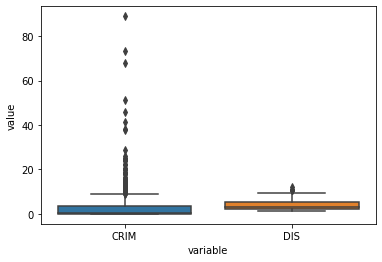

In [226]:
bx=data[['CRIM','DIS']]
sns.boxplot(x='variable',y='value',data=pd.melt(bx))

<AxesSubplot:xlabel='CRIM'>

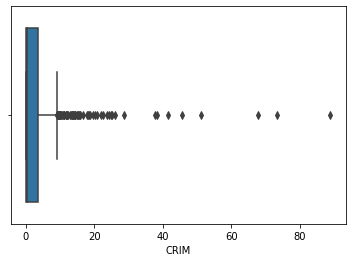

In [227]:
sns.boxplot(x=data['CRIM'])

In [10]:
from scipy import stats

In [20]:
boston_c=data

In [21]:
zcore=np.abs(stats.zscore(boston_c))

In [22]:
boston_clean=boston_c

In [23]:
#Remove outliers using zscore
boston_clean=boston_clean[(zcore<3).all(axis=1)]

In [24]:
boston_c.shape

(506, 13)

In [25]:
boston_clean.shape

(415, 13)

In [26]:
boston_iqr=data
Q1=boston_iqr.quantile(0.25)
Q3=boston_iqr.quantile(0.75)
IQR=Q3-Q1

In [27]:
#Remove outliers using IQR(Inter quartile range)
boston_iqr=boston_iqr[~((boston_iqr < Q1 - (1.5 * IQR)) | (boston_iqr > (Q3 + 1.5 * IQR))).any(axis=1)]

In [28]:
boston_iqr.shape

(274, 13)

### $log_{10}$ Transformation (Convert Skewed data into Normal Distribution)
It is used when data is positively skewed(higly skewed in right hence side) and negatively skewed vice versa. It can't be applied on zero or negative value. 

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
data=pd.read_csv('E:DS/Datasets/skewed.csv')

In [84]:
data.head()

,Positive Skewed,Negative Skewed,Normally Distributed
0,10,1,1
1,1,1,1
2,1,1,1
3,11,1,5
4,1,10,5


In [67]:
data.columns

Index(['Positive Skewed', 'Negative Skewed', 'Normally Distributed'], dtype='object')

<AxesSubplot:xlabel='variable', ylabel='value'>

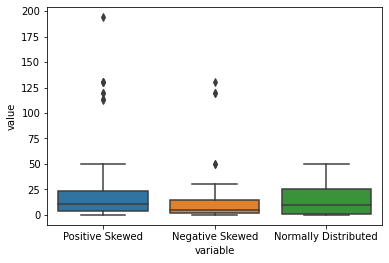

In [78]:
sns.boxplot(x='variable',y='value',data=data.melt())

In [79]:
print('Mean Positive',np.mean(data['Positive Skewed']))
print('Median Positive',np.median(data['Positive Skewed']))
print('Mean Negative Skewed',np.mean(data['Negative Skewed']))
print('Median Negative Skewed',np.median(data['Negative Skewed']))

Mean Positive 29.75925925925926
Median Positive 11.0
Mean Negative Skewed 15.907407407407407
Median Negative Skewed 5.0


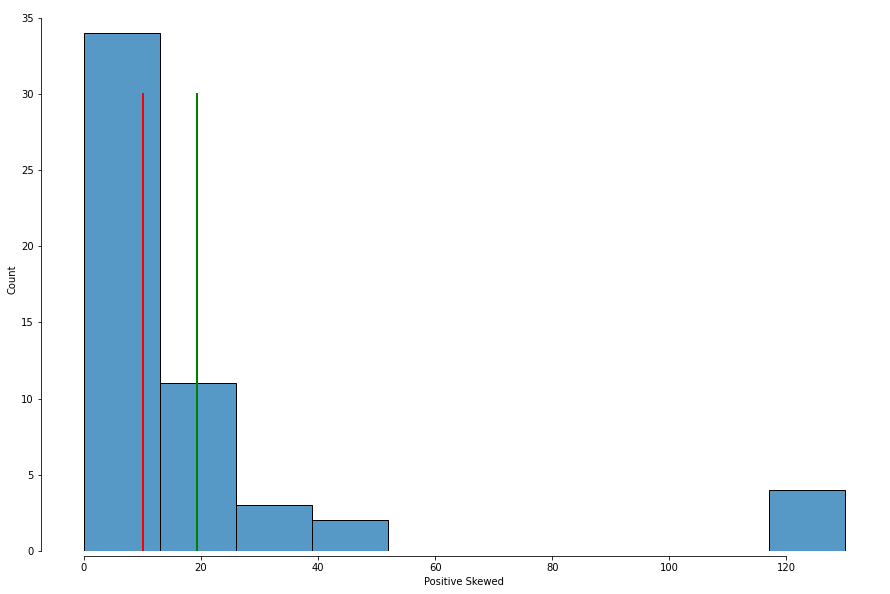

In [75]:
plt.figure(figsize=(15,10))
sns.histplot(data['Positive Skewed'],bins=10)
sns.despine(offset=5,trim=True)
#plot mean
mean=np.mean(data['Positive Skewed'])
mp1=(mean,0)
mp2=(mean,30)
mx,my=zip(mp1,mp2)
plt.plot(mx,my,color='green',linewidth=2)
#plot median
median=np.median(data['Positive Skewed'])
mp11=(median,0)
mp22=(median,30)
mx,my=zip(mp11,mp22)
plt.plot(mx,my,color='red',linewidth=2)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1080x720 with 0 Axes>

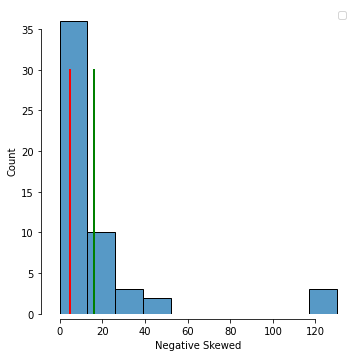

In [73]:
plt.figure(figsize=(15,10))
sns.displot(data['Negative Skewed'],bins=10)
sns.despine(offset=5,trim=True)
#plot mean
mp1=(data['Negative Skewed'].mean(),0)
mp2=(data['Negative Skewed'].mean(),30)
mx,my=zip(mp1,mp2)
plt.plot(mx,my,color='green',linewidth=2)
#plot median
mp11=(data['Negative Skewed'].median(),0)
mp22=(data['Negative Skewed'].median(),30)
mx,my=zip(mp11,mp22)
plt.plot(mx,my,color='red',linewidth=2)
plt.legend()
plt.show()

In [85]:
positively_skewed_log10=np.log10(data['Positive Skewed'])

In [ ]:
positively_skewed_log10

C:\Users\RizzWann\anaconda3\envs\PracticeStats\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Positive Skewed', ylabel='Density'>

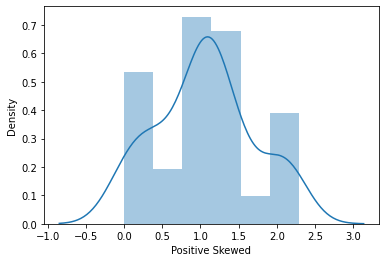

In [88]:
sns.distplot(positively_skewed_log10)

In [ ]:
nag_skewed_log10=np.log10(data['Negative Skewed'])
nag_skewed_log10

C:\Users\RizzWann\anaconda3\envs\PracticeStats\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Negative Skewed', ylabel='Density'>

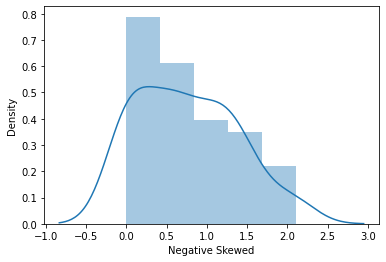

In [91]:
sns.distplot(nag_skewed_log10)

<AxesSubplot:>

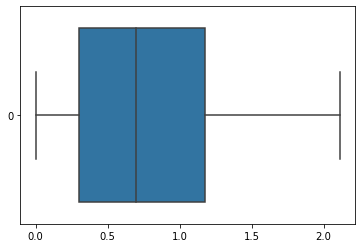

In [98]:
sns.boxplot(data=nag_skewed_log10,orient='h')

<AxesSubplot:>

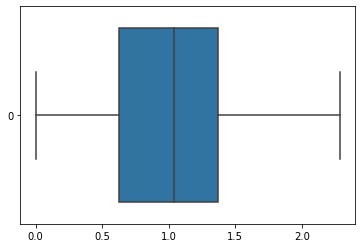

In [99]:
sns.boxplot(data=positively_skewed_log10,orient='h')

### Square Root Transformation
It is weaker than log10. It also can apply at zero values. But it cant apply at negative.

In [100]:
nag_skewed_sqrt=np.sqrt(data['Negative Skewed'])
nag_skewed_sqrt

0      1.000000
1      1.000000
2      1.000000
3      1.000000
4      3.162278
5      3.162278
6      3.872983
7      3.872983
8      4.472136
9      4.472136
10     5.477226
11     7.071068
12    10.954451
13    11.401754
14    10.954451
15     7.071068
16     5.477226
17     5.477226
18     5.000000
19     4.472136
20     4.472136
21     3.872983
22     3.872983
23     3.605551
24     3.316625
25     3.000000
26     2.645751
27     2.449490
28     2.449490
29     2.236068
30     2.236068
31     2.236068
32     2.000000
33     2.000000
34     2.000000
35     2.000000
36     1.732051
37     1.732051
38     1.732051
39     1.732051
40     1.414214
41     1.414214
42     1.414214
43     1.414214
44     1.414214
45     1.000000
46     1.000000
47     1.000000
48     1.000000
49     1.000000
50     1.000000
51     1.000000
52     1.000000
53     1.000000
Name: Negative Skewed, dtype: float64

<AxesSubplot:>

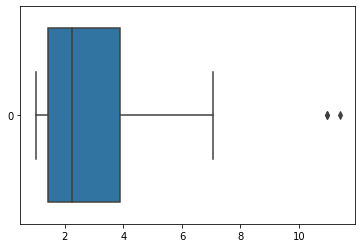

In [101]:
sns.boxplot(data=nag_skewed_sqrt,orient='h')

In [102]:
import re 

In [178]:
rawData={'data':[   "5001 1.0002 None 2018-01-20 no" ,
				  "5002 2000.0 Glazed 2018-01-21 yes" ,
				  "5005 30.05   Sugar 2018-01-22 yes" ,
				  "5003 4.004   Chocolate 2018-01-23 no" ,
				  "5004 5.0   Maple 2018-01-25 yes" ]}

In [199]:
data=pd.DataFrame(rawData,columns=['data'])
for r in range(0,len(data)):
    data['id']=str.split(data['data'][r])[0]
data['id']

0    5004
1    5004
2    5004
3    5004
4    5004
Name: id, dtype: object

In [192]:
data['Name']=data['data'].str.extract('([A-Z]\w{0,})',expand=True)

In [193]:
data['Name']

0         None
1       Glazed
2        Sugar
3    Chocolate
4        Maple
Name: Name, dtype: object

In [163]:
data['id']=data['data'].str.extract('([0-9]{0,})',expand=True)

In [164]:
data['id']

0    5001
1    5002
2    5005
3    5003
4    5004
Name: id, dtype: object

In [165]:
data['f']=data['data'].str.extract('([0-9]*[.][0-9]*)',expand=True)

In [166]:
data['f']

0    1.0002
1    2000.0
2     30.05
3     4.004
4       5.0
Name: f, dtype: object

In [167]:
data['date']=data['data'].str.extract('([0-9]*[-][0-9]*[-][0-9]*)',expand=True)

In [168]:
data['date']

0    2018-01-20
1    2018-01-21
2    2018-01-22
3    2018-01-23
4    2018-01-25
Name: date, dtype: object

In [169]:
data

,data,Name,id,f,date
0,5001 1.0002 None 2018-01-20,None,5001,1.0002,2018-01-20
1,5002 2000.0 Glazed 2018-01-21,Glazed,5002,2000.0,2018-01-21
2,5005 30.05 Sugar 2018-01-22,Sugar,5005,30.05,2018-01-22
3,5003 4.004 Chocolate 2018-01-23,Chocolate,5003,4.004,2018-01-23
4,5004 5.0 Maple 2018-01-25,Maple,5004,5.0,2018-01-25


In [172]:
capitilize= lambda x : x.upper()


In [173]:
data['Name'].apply(capitilize)

0         NONE
1       GLAZED
2        SUGAR
3    CHOCOLATE
4        MAPLE
Name: Name, dtype: object

In [2]:
data=pd.read_csv('E:DS/Datasets/mcdonalds_dataset.csv')

In [3]:
data.shape

(16671, 11)

In [4]:
data.columns

Index(['lat', 'lon', 'alt', 'is_broken', 'is_active', 'dot', 'state', 'city',
       'street', 'country', 'last_checked'],
      dtype='object')

In [5]:
data.head()

,lat,lon,alt,is_broken,is_active,dot,state,city,street,country,last_checked
0,-73.988281,40.718830,0,False,True,working,NY,New York,114 Delancey St,USA,Checked 142 minutes ago
1,-74.005090,40.728794,0,False,True,working,NY,New York,208 Varick St,USA,Checked 142 minutes ago
2,-73.993408,40.729197,0,False,True,working,NY,New York,724 Broadway,USA,Checked 142 minutes ago
3,-73.985855,40.726555,0,False,True,working,NY,New York,102 1st Ave,USA,Checked 142 minutes ago
4,-73.991692,40.691383,0,True,True,broken,NY,Brooklyn,82 Court St,USA,Checked 142 minutes ago


In [6]:
data.isnull().sum()

lat             0
lon             0
alt             0
is_broken       0
is_active       0
dot             0
state           0
city            8
street          0
country         0
last_checked    0
dtype: int64

In [8]:
data.to_csv('E:DS/Datasets/mcdonalds.csv')